In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import geoplot as gplt

In [3]:
import geopandas as gpd

In [4]:
from shapely.geometry import Polygon, Point

In [5]:
from pyproj import Proj, transform, CRS

In [6]:
file_tracts = '../resource_files/bexar_county/Bexar_County_Census_Tracts-shp/Bexar_County_Census_Tracts.shp'
file_block_groups = '../resource_files/bexar_county/Bexar_County_Census_Block_Groups-shp/Bexar_County_Census_Block_Groups.shp'
file_blocks = '../resource_files/bexar_county/Bexar_County_Census_Blocks-shp/Bexar_County_Census_Blocks.shp'
file_stops =  '../resource_files/google_transit/stops.csv'

In [7]:
gdf_tracts = gpd.read_file(file_tracts).set_index('TRACT')

In [8]:
gdf_tracts['density']=gdf_tracts.SUM_POPULA / gdf_tracts.ShapeSTAre.min()

In [9]:
gdf_tracts.head()

,OBJECTID,SUM_POPULA,ShapeSTAre,ShapeSTLen,geometry,density
TRACT,,,,,,
48029110100,1,3379,3.816858e+07,26074.749275,"POLYGON ((-98.48695 29.43502, -98.48626 29.434...",0.000433
48029110300,2,2542,1.667905e+07,22363.990201,"POLYGON ((-98.47326 29.41461, -98.47326 29.413...",0.000325
48029110500,3,2238,1.366653e+07,16048.493069,"POLYGON ((-98.50799 29.42314, -98.50812 29.422...",0.000287
48029110600,4,7553,2.117379e+07,20426.412628,"POLYGON ((-98.50111 29.42735, -98.50121 29.426...",0.000967
48029110700,5,1398,1.058371e+07,16998.776148,"POLYGON ((-98.50401 29.44202, -98.50386 29.441...",0.000179


In [10]:
gdf_block_groups = gpd.read_file(file_block_groups).set_index('BLOCKGROUP')

In [11]:
gdf_block_groups['density']=gdf_block_groups.SUM_POPULA / gdf_block_groups.ShapeSTAre

In [12]:
gdf_block_groups.head()

,OBJECTID,SUM_POPULA,Shape_STAr,Shape_STLe,ShapeSTAre,ShapeSTLen,geometry,density
BLOCKGROUP,,,,,,,,
480291101001,1,955,1.951706e+07,23279.128568,1.951706e+07,23279.128568,"POLYGON ((-98.48695 29.43502, -98.48626 29.434...",0.000049
480291101002,2,694,7.319464e+06,14609.297870,7.319464e+06,14609.297870,"POLYGON ((-98.48824 29.41933, -98.48826 29.418...",0.000095
480291101003,3,1730,1.133205e+07,14546.232289,1.133205e+07,14546.232289,"POLYGON ((-98.49432 29.43370, -98.49426 29.433...",0.000153
480291103001,4,1041,4.292228e+06,9662.074836,4.292228e+06,9662.074836,"POLYGON ((-98.47984 29.40970, -98.47983 29.409...",0.000243
480291103002,5,797,4.074139e+06,10523.204970,4.074139e+06,10523.204970,"POLYGON ((-98.47989 29.40860, -98.47992 29.408...",0.000196


In [13]:
gdf_block_groups[gdf_block_groups.SUM_POPULA == 0]

,OBJECTID,SUM_POPULA,Shape_STAr,Shape_STLe,ShapeSTAre,ShapeSTLen,geometry,density
BLOCKGROUP,,,,,,,,
480299800041,1082,0,1.053470e+08,49901.049403,1.053470e+08,49901.049403,"POLYGON ((-98.45853 29.54689, -98.45767 29.546...",0.0


In [14]:
gdf_blocks = gpd.read_file(file_blocks).set_index('BLOCK')

In [15]:
gdf_blocks['density']=gdf_blocks.POPULATION / gdf_blocks.ShapeSTAre

In [16]:
gdf_blocks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 26452 entries, 480291919003005 to 480291317001070
Columns: 259 entries, OBJECTID to density
dtypes: float64(4), geometry(1), int64(225), object(29)
memory usage: 52.5+ MB


In [17]:
gdf_blocks.columns.to_list()

['OBJECTID',
 'ID',
 'COLORING',
 'BLOCKGROUP',
 'TRACT',
 'COUNTY',
 'STATE',
 'BLOCK2000',
 'MCD',
 'SUBMCD',
 'PLACE',
 'CONCITY',
 'VTD',
 'CONGRESS',
 'LOWERSLD',
 'UPPERSLD',
 'COUNTYLD',
 'CITYLD',
 'INDIAN',
 'TRUST',
 'TRIBALSUB',
 'ANRC',
 'CSA',
 'CBSA',
 'CBSADIV',
 'UA',
 'UGA',
 'ELEMSCHOOL',
 'SECSCHOOL',
 'UNIFSCHOOL',
 'ZIP5',
 'URBANRURAL',
 'POPULATION',
 'WHITE',
 'BLACK',
 'AMINDIAN',
 'ASIAN',
 'HAWAIIAN',
 'OTHER',
 'WHTBLK',
 'WHTIND',
 'WHTASN',
 'WHTHWN',
 'WHTOTH',
 'BLKIND',
 'BLKASN',
 'BLKHWN',
 'BLKOTH',
 'INDASN',
 'INDHWN',
 'INDOTH',
 'ASNHWN',
 'ASNOTH',
 'HWNOTH',
 'WHTBLKIND',
 'WHTBLKASN',
 'WHTBLKHWN',
 'WHTBLKOTH',
 'WHTINDASN',
 'WHTINDHWN',
 'WHTINDOTH',
 'WHTASNHWN',
 'WHTASNOTH',
 'WHTHWNOTH',
 'BLKINDASN',
 'BLKINDHWN',
 'BLKINDOTH',
 'BLKASNHWN',
 'BLKASNOTH',
 'BLKHWNOTH',
 'INDASNHWN',
 'INDASNOTH',
 'INDHWNOTH',
 'ASNHWNOTH',
 'WHTBLKINDA',
 'WHTBLKINDH',
 'WHTBLKINDO',
 'WHTBLKASNH',
 'WHTBLKASNO',
 'WHTBLKHWNO',
 'WHTINDASNH',
 'WHTIND

In [18]:
gdf_blocks.MCD.value_counts()

4802993407    12969
4802993409     3595
4802993411     3166
4802993412     2634
4802993414     1853
4802993413     1284
4802993408      951
Name: MCD, dtype: int64

In [19]:
gdf_blocks.SUBMCD.value_counts()

Series([], Name: SUBMCD, dtype: int64)

In [20]:
gdf_blocks.PLACE.value_counts()

4865000    19293
4816468      274
4874408      260
4801600      209
4860608      205
4843096      191
4842388      181
4873057      133
4872296      131
4840036      130
4839448      124
4879672      119
4813276      112
4833146      111
4866704      106
4866128       79
4853988       77
4866089       77
4823272       76
4834628       67
4867268       59
4825168       58
4868708       47
4864172       46
4805384       45
4817811       42
4875764       41
4845576       38
4833968       26
4814716       21
4831100       21
4845288        6
4814920        1
Name: PLACE, dtype: int64

In [21]:
gdf_blocks.VTD.value_counts()

480294001    386
480293097    275
480294007    271
480291058    270
480294074    221
            ... 
480292130      1
480294140      1
480294143      1
480294167      1
480294113      1
Name: VTD, Length: 620, dtype: int64

In [22]:
gdf_blocks.LOWERSLD.value_counts()

48118    3428
48122    3332
48123    3077
48117    3053
48120    2976
48119    2779
48121    2230
48116    1979
48124    1940
48125    1658
Name: LOWERSLD, dtype: int64

In [23]:
gdf_blocks.UPPERSLD.value_counts()

48026    10412
48019     8228
48025     5361
48021     2451
Name: UPPERSLD, dtype: int64

In [24]:
gdf_blocks.CBSA.value_counts()

41700    26452
Name: CBSA, dtype: int64

In [25]:
gdf_blocks.CBSA.value_counts()

41700    26452
Name: CBSA, dtype: int64

In [26]:
gdf_blocks.UNIFSCHOOL.value_counts()

4838730    7222
4833120    5282
4832940    4447
4824990    1464
4817850    1094
4818150    1046
4822470     933
4840950     874
4807590     743
4840680     706
4840920     565
4840740     391
4810710     290
4814730     283
4820160     267
4839480     229
4836450     220
4826370     218
4830060     171
4819350       7
Name: UNIFSCHOOL, dtype: int64

In [27]:
keep_cols = [
    'OBJECTID',
    'ID',
    'COLORING',
#     'BLOCK',
    'BLOCKGROUP',
#     'TRACT',
#     'COUNTY',
#     'STATE',
#     'BLOCK2000',
    'MCD',
#     'SUBMCD',
    'PLACE',
#     'CONCITY',
    'VTD',
    'CONGRESS',
    'LOWERSLD',
    'UPPERSLD',
#     'COUNTYLD',
#     'CITYLD',
#     'INDIAN',
#     'TRUST',
#     'TRIBALSUB',
#     'ANRC',
#     'CSA',
#     'CBSA',
#     'CBSADIV',
#     'UA',
#     'UGA',
#     'ELEMSCHOOL',
#     'SECSCHOOL',
    'UNIFSCHOOL',
#     'ZIP5',
#     'URBANRURAL',
    'POPULATION',
#     'WHITE',
#     'BLACK',
#     'AMINDIAN',
#     'ASIAN',
#     'HAWAIIAN',
#     'OTHER',
#     'WHTBLK',
#     'WHTIND',
#     'WHTASN',
#     'WHTHWN',
#     'WHTOTH',
#     'BLKIND',
#     'BLKASN',
#     'BLKHWN',
#     'BLKOTH',
#     'INDASN',
#     'INDHWN',
#     'INDOTH',
#     'ASNHWN',
#     'ASNOTH',
#     'HWNOTH',
#     'WHTBLKIND',
#     'WHTBLKASN',
#     'WHTBLKHWN',
#     'WHTBLKOTH',
#     'WHTINDASN',
#     'WHTINDHWN',
#     'WHTINDOTH',
#     'WHTASNHWN',
#     'WHTASNOTH',
#     'WHTHWNOTH',
#     'BLKINDASN',
#     'BLKINDHWN',
#     'BLKINDOTH',
#     'BLKASNHWN',
#     'BLKASNOTH',
#     'BLKHWNOTH',
#     'INDASNHWN',
#     'INDASNOTH',
#     'INDHWNOTH',
#     'ASNHWNOTH',
#     'WHTBLKINDA',
#     'WHTBLKINDH',
#     'WHTBLKINDO',
#     'WHTBLKASNH',
#     'WHTBLKASNO',
#     'WHTBLKHWNO',
#     'WHTINDASNH',
#     'WHTINDASNO',
#     'WHTINDHWNO',
#     'WHTASNHWNO',
#     'BLKINDASNH',
#     'BLKINDASNO',
#     'BLKINDHWNO',
#     'BLKASNHWNO',
#     'INDASNHWNO',
#     'WHTBLKIND1',
#     'WHTBLKIND2',
#     'WHTBLKIND3',
#     'WHTBLKASN1',
#     'WHTINDASN1',
#     'BLKINDASN1',
#     'ALL_RACES',
#     'AP_WHT',
#     'NP_WHT',
#     'AP_BLK',
#     'NP_BLK',
#     'AP_IND',
#     'NP_IND',
#     'AP_ASN',
#     'NP_ASN',
#     'AP_HWN',
#     'NP_HWN',
#     'AP_OTH',
#     'NP_OTH',
#     'F1_RACE',
#     'F2_RACES',
#     'F2_RACES1',
#     'F3_RACES',
#     'F4_RACES',
#     'F5_RACES',
    'HISPANIC_O',
    'NOT_HISPAN',
    'NH_WHT',
    'NH_BLK',
#     'NH_IND',
    'NH_ASN',
#     'NH_HWN',
#     'NH_OTH',
#     'NH_WHTBLK',
#     'NH_WHTIND',
#     'NH_WHTASN',
#     'NH_WHTHWN',
#     'NH_WHTOTH',
#     'NH_BLKIND',
#     'NH_BLKASN',
#     'NH_BLKHWN',
#     'NH_BLKOTH',
#     'NH_INDASN',
#     'NH_INDHWN',
#     'NH_INDOTH',
#     'NH_ASNHWN',
#     'NH_ASNOTH',
#     'NH_HWNOTH',
#     'NH_WHTBLKI',
#     'NH_WHTBLKA',
#     'NH_WHTBLKH',
#     'NH_WHTBLKO',
#     'NH_WHTINDA',
#     'NH_WHTINDH',
#     'NH_WHTINDO',
#     'NH_WHTASNH',
#     'NH_WHTASNO',
#     'NH_WHTHWNO',
#     'NH_BLKINDA',
#     'NH_BLKINDH',
#     'NH_BLKINDO',
#     'NH_BLKASNH',
#     'NH_BLKASNO',
#     'NH_BLKHWNO',
#     'NH_INDASNH',
#     'NH_INDASNO',
#     'NH_INDHWNO',
#     'NH_ASNHWNO',
#     'NH_WHTBLK1',
#     'NH_WHTBLK2',
#     'NH_WHTBLK3',
#     'NH_WHTBLK4',
#     'NH_WHTBLK5',
#     'NH_WHTBLK6',
#     'NH_WHTIND1',
#     'NH_WHTIND2',
#     'NH_WHTIND3',
#     'NH_WHTASN1',
#     'NH_BLKIND1',
#     'NH_BLKIND2',
#     'NH_BLKIND3',
#     'NH_BLKASN1',
#     'NH_INDASN1',
#     'NH_WHTBLK7',
#     'NH_WHTBLK8',
#     'NH_WHTBLK9',
#     'NH_WHTBL10',
#     'NH_WHTIND4',
#     'NH_BLKIND4',
#     'NH_ALL_RAC',
#     'NH_AP_WHT',
#     'NH_NP_WHT',
#     'NH_AP_BLK',
#     'NH_NP_BLK',
#     'NH_AP_IND',
#     'NH_NP_IND',
#     'NH_AP_ASN',
#     'NH_NP_ASN',
#     'NH_AP_HWN',
#     'NH_NP_HWN',
#     'NH_AP_OTH',
#     'NH_NP_OTH',
#     'NH_1_RACE',
#     'NH_2_RACES',
#     'NH_2_RACE1',
#     'NH_3_RACES',
#     'NH_4_RACES',
#     'NH_5_RACES',
#     'NH_DOJ_BLK',
#     'NH_DOJ_IND',
#     'NH_DOJ_ASN',
#     'NH_DOJ_HWN',
#     'NH_DOJ_OTH',
#     'NH_DOJ_OT1',
#     'F18_POP',
#     'F18_WHT',
#     'F18_BLK',
#     'F18_IND',
#     'F18_ASN',
#     'F18_HWN',
#     'F18_OTH',
#     'F18_WHTBLK',
#     'F18_WHTIND',
#     'F18_WHTASN',
#     'F18_WHTHWN',
#     'F18_WHTOTH',
#     'F18_BLKIND',
#     'F18_BLKASN',
#     'F18_BLKHWN',
#     'F18_BLKOTH',
#     'F18_INDASN',
#     'F18_INDHWN',
#     'F18_INDOTH',
#     'F18_ASNHWN',
#     'F18_ASNOTH',
#     'F18_HWNOTH',
#     'F18_WHTBL1',
#     'F18_WHTBL2',
#     'F18_WHTBL3',
#     'F18_WHTBL4',
#     'F18_WHTIN1',
#     'F18_WHTIN2',
#     'F18_WHTIN3',
#     'F18_WHTAS1',
#     'F18_WHTAS2',
#     'F18_WHTHW1',
#     'F18_BLKIN1',
#     'F18_BLKIN2',
#     'F18_BLKIN3',
#     'F18_BLKAS1',
#     'F18_BLKAS2',
#     'F18_BLKHW1',
#     'F18_INDAS1',
#     'F18_INDAS2',
#     'F18_INDHW1',
#     'F18_ASNHW1',
#     'F18_WHTBL5',
#     'F18_WHTBL6',
#     'F18_WHTBL7',
#     'F18_WHTBL8',
#     'F18_WHTBL9',
#     'F18_WHTB10',
#     'F18_WHTIN4',
#     'F18_WHTIN5',
#     'F18_WHTIN6',
    'gecovector',
    'ShapeSTAre',
    'ShapeSTLen',
    
    'density',
    
    'geometry'
]

In [28]:
gdf_blocks = gdf_blocks[keep_cols]

In [29]:
gdf_blocks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 26452 entries, 480291919003005 to 480291317001070
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    26452 non-null  int64   
 1   ID          26452 non-null  int64   
 2   COLORING    26452 non-null  int64   
 3   BLOCKGROUP  26452 non-null  object  
 4   MCD         26452 non-null  object  
 5   PLACE       22406 non-null  object  
 6   VTD         26452 non-null  object  
 7   CONGRESS    26452 non-null  object  
 8   LOWERSLD    26452 non-null  object  
 9   UPPERSLD    26452 non-null  object  
 10  UNIFSCHOOL  26452 non-null  object  
 11  POPULATION  26452 non-null  int64   
 12  HISPANIC_O  26452 non-null  int64   
 13  NOT_HISPAN  26452 non-null  int64   
 14  NH_WHT      26452 non-null  int64   
 15  NH_BLK      26452 non-null  int64   
 16  NH_ASN      26452 non-null  int64   
 17  gecovector  26452 non-null  float64 
 18  ShapeSTAre  26452 n

In [30]:
gdf_blocks.describe()

,OBJECTID,ID,COLORING,POPULATION,HISPANIC_O,NOT_HISPAN,NH_WHT,NH_BLK,NH_ASN,gecovector,ShapeSTAre,ShapeSTLen,density
count,26452.000000,2.645200e+04,26452.000000,26452.000000,26452.000000,26452.000000,26452.000000,26452.000000,26452.000000,26452.000000,2.645200e+04,26452.000000,26452.000000
mean,13226.500000,1.243468e+06,1.690761,64.825835,38.067367,26.758468,19.625095,4.478300,1.495577,0.047543,1.323467e+06,3933.463649,0.000154
std,7636.178997,6.258835e+05,1.286938,150.554807,83.451999,82.360602,60.208552,19.885058,10.327261,0.253393,7.053571e+06,6037.748803,0.000212
min,1.000000,4.145400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,5.252539e+01,41.829450,0.000000
25%,6613.750000,7.329382e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004255,1.184276e+05,1620.049860,0.000000
50%,13226.500000,1.281186e+06,2.000000,31.000000,14.000000,4.000000,2.000000,0.000000,0.000000,0.008064,2.244722e+05,2310.058933,0.000115
75%,19839.250000,1.736940e+06,3.000000,71.000000,46.000000,25.000000,19.000000,2.000000,0.000000,0.016316,4.541329e+05,3694.748299,0.000259
max,26452.000000,2.385761e+06,7.000000,4140.000000,2463.000000,2729.000000,2081.000000,816.000000,976.000000,11.415016,3.177830e+08,118400.197856,0.009911


In [31]:
gdf_blocks.head()

,OBJECTID,ID,COLORING,BLOCKGROUP,MCD,PLACE,VTD,CONGRESS,LOWERSLD,UPPERSLD,...,HISPANIC_O,NOT_HISPAN,NH_WHT,NH_BLK,NH_ASN,gecovector,ShapeSTAre,ShapeSTLen,density,geometry
BLOCK,,,,,,,,,,,,,,,,,,,,,
480291919003005,1,1400310,4,480291919003,4802993407,4865000,480294004,4821,48120,48019,...,11,2,0,0,0,0.001038,28896.121094,1063.271402,0.000450,"POLYGON ((-98.46781 29.42506, -98.46783 29.424..."
480291411011002,2,1400328,3,480291411011,4802993407,4865000,480291074,4823,48119,48019,...,0,0,0,0,0,0.018304,509512.736328,8615.618889,0.000000,"POLYGON ((-98.46881 29.36511, -98.46815 29.364..."
480291411011006,3,1400348,3,480291411011,4802993407,4865000,480291074,4823,48119,48019,...,82,20,16,2,0,0.012803,356394.378906,2836.366689,0.000286,"POLYGON ((-98.46323 29.36640, -98.46324 29.365..."
480291410002007,4,1400365,1,480291410002,4802993407,4865000,480291074,4823,48119,48019,...,149,13,13,0,0,0.012892,358877.382812,2852.304380,0.000451,"POLYGON ((-98.46667 29.36662, -98.46668 29.367..."
480291410002006,5,1400383,3,480291410002,4802993407,4865000,480291074,4823,48119,48019,...,124,9,5,4,0,0.016129,448943.710938,2994.127235,0.000296,"POLYGON ((-98.46668 29.36753, -98.46667 29.368..."


In [32]:
gdf_blocks[['BLOCKGROUP','POPULATION']][gdf_blocks.POPULATION == 0].groupby('BLOCKGROUP').count().rename(columns={'POPULATION': 'Blocks'})

,Blocks
BLOCKGROUP,
480291101001,132
480291101002,50
480291101003,68
480291103001,19
480291103002,4
...,...
480299800021,39
480299800031,86
480299800041,57


In [33]:
chk_cols = [
#     'BLOCK',
    'POPULATION',
    'NH_WHT',
    'NH_BLK',
    'NH_ASN',
    'HISPANIC_O',
    'NOT_HISPAN',
    
]

In [34]:
gdf_chk = gdf_blocks[chk_cols]

In [35]:
gdf_chk

,POPULATION,NH_WHT,NH_BLK,NH_ASN,HISPANIC_O,NOT_HISPAN
BLOCK,,,,,,
480291919003005,13,0,0,0,11,2
480291411011002,0,0,0,0,0,0
480291411011006,102,16,2,0,82,20
480291410002007,162,13,0,0,149,13
480291410002006,133,5,4,0,124,9
...,...,...,...,...,...,...
480291317001083,0,0,0,0,0,0
480291317001082,0,0,0,0,0,0
480291317001081,0,0,0,0,0,0


In [36]:
df_stops = pd.read_csv(file_stops).set_index('stop_id')

In [37]:
df_stops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6491 entries, 25316 to 74369
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_code            6491 non-null   int64  
 1   stop_name            6491 non-null   object 
 2   stop_desc            1608 non-null   object 
 3   stop_lat             6491 non-null   float64
 4   stop_lon             6491 non-null   float64
 5   zone_id              0 non-null      float64
 6   stop_url             0 non-null      float64
 7   location_type        0 non-null      float64
 8   parent_station       0 non-null      float64
 9   stop_timezone        0 non-null      float64
 10  wheelchair_boarding  6491 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 608.5+ KB


In [38]:
df_stops.describe()

,stop_code,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
count,6491.000000,6491.000000,6491.000000,0.0,0.0,0.0,0.0,0.0,6491.0
mean,55405.448313,29.455182,-98.522178,NaN,NaN,NaN,NaN,NaN,0.0
std,27111.251565,0.064817,0.077617,NaN,NaN,NaN,NaN,NaN,0.0
min,10013.000000,29.294060,-98.711000,NaN,NaN,NaN,NaN,NaN,0.0
25%,29846.000000,29.408544,-98.573360,NaN,NaN,NaN,NaN,NaN,0.0
50%,55429.000000,29.450496,-98.517246,NaN,NaN,NaN,NaN,NaN,0.0
75%,79626.500000,29.503407,-98.468857,NaN,NaN,NaN,NaN,NaN,0.0
max,99996.000000,29.650497,-98.306921,NaN,NaN,NaN,NaN,NaN,0.0


In [39]:
df_stops = df_stops[['stop_code', 'stop_name', 'stop_lat', 'stop_lon', 'wheelchair_boarding']]

In [40]:
df_stops.head()

,stop_code,stop_name,stop_lat,stop_lon,wheelchair_boarding
stop_id,,,,,
25316,25316,BLANCO & DRESDEN,29.499014,-98.507783,0
72479,72479,FRESNO & IH-10 W ACCESS RD.,29.474488,-98.516238,0
56239,56239,FREDERICKSBURG RD. & N. FLORES,29.441883,-98.503773,0
76759,76759,MARTIN & N. FRIO,29.430081,-98.503058,0
88973,88973,DOLOROSA & S. FLORES,29.424073,-98.494741,0


In [41]:
df_stops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6491 entries, 25316 to 74369
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_code            6491 non-null   int64  
 1   stop_name            6491 non-null   object 
 2   stop_lat             6491 non-null   float64
 3   stop_lon             6491 non-null   float64
 4   wheelchair_boarding  6491 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 304.3+ KB


In [42]:
gdf_stops = gpd.GeoDataFrame(
    df_stops,
    geometry = gpd.points_from_xy(df_stops.stop_lon, df_stops.stop_lat),
    crs={'epsg:4326'}
)

In [43]:
gdf_stops.crs

{'epsg:4326'}

In [44]:
CRS('EPSG:4326')

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
CRS('EPSG:3857')

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
CRS('EPSG:32140')

<Projected CRS: EPSG:32140>
Name: NAD83 / Texas South Central
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - Texas - SPCS83 - SC
- bounds: (-105.0, 27.78, -93.76, 30.67)
Coordinate Operation:
- name: SPCS83 Texas South Central zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [47]:
CRS('EPSG:2278')

<Projected CRS: EPSG:2278>
Name: NAD83 / Texas South Central (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Texas - SPCS83 - SC
- bounds: (-105.0, 27.78, -93.76, 30.67)
Coordinate Operation:
- name: SPCS83 Texas South Central zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [48]:
gdf_stops.head()

,stop_code,stop_name,stop_lat,stop_lon,wheelchair_boarding,geometry
stop_id,,,,,,
25316,25316,BLANCO & DRESDEN,29.499014,-98.507783,0,POINT (-98.50778 29.49901)
72479,72479,FRESNO & IH-10 W ACCESS RD.,29.474488,-98.516238,0,POINT (-98.51624 29.47449)
56239,56239,FREDERICKSBURG RD. & N. FLORES,29.441883,-98.503773,0,POINT (-98.50377 29.44188)
76759,76759,MARTIN & N. FRIO,29.430081,-98.503058,0,POINT (-98.50306 29.43008)
88973,88973,DOLOROSA & S. FLORES,29.424073,-98.494741,0,POINT (-98.49474 29.42407)


In [49]:
gdf_county = gdf_tracts[['geometry']].copy()

gdf_county['county'] = 'Bexar'
gdf_county = gdf_county.dissolve(by='county')

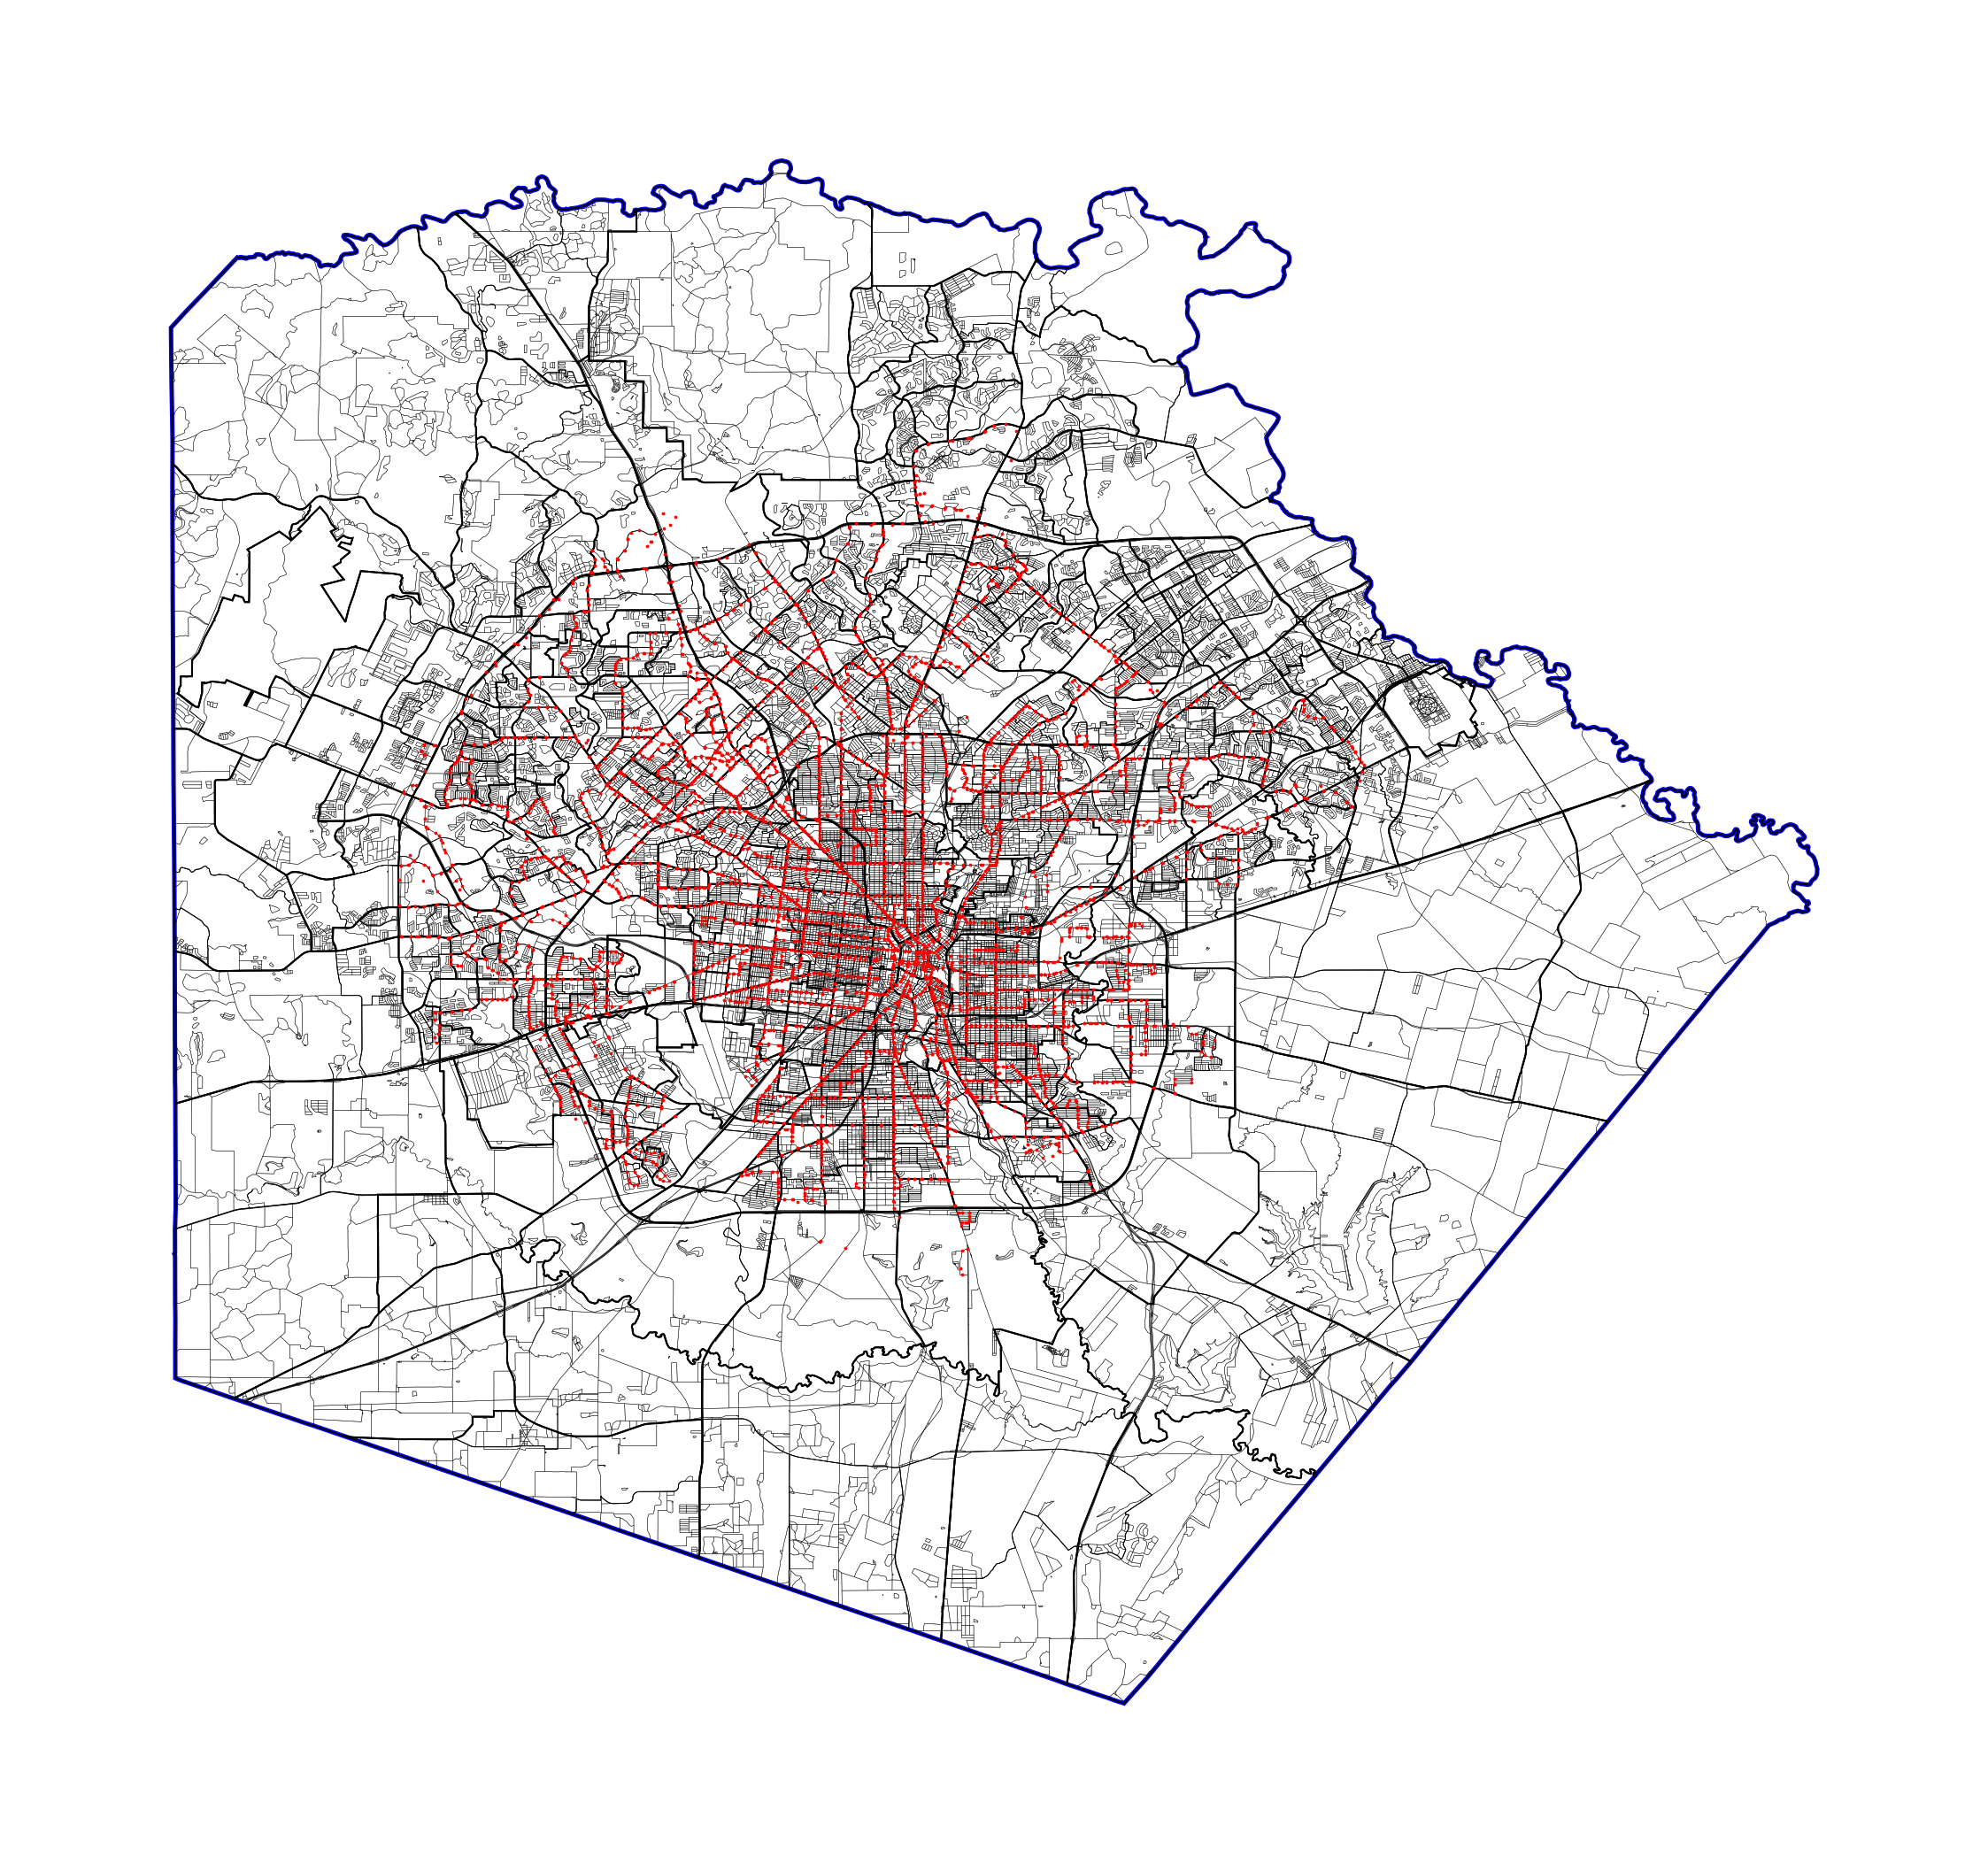

In [50]:
fig, ax = plt.subplots(figsize=(40,40))
ax.set_aspect('equal')
# plt.figure(figsize=(40,40))

# ax = gdf_county.plot(figsize=(40,40), color='white', edgecolor='blue', linewidth=5)
axbase = gplt.polyplot(gdf_county, ax=ax, facecolor='white', edgecolor='blue', linewidth=5)


# axb = gplt.choropleth(gdf_blocks, ax=ax, hue='density', edgecolor='none', cmap='Blues', alpha=0.75, linewidth=0)
# axbg = gplt.choropleth(gdf_block_groups, ax=ax, hue='density', cmap='Blues', edgecolor='black', alpha=.25, linewidth=1)

axt = gplt.polyplot(gdf_tracts, ax=ax, facecolor='none', edgecolor='black', alpha=1, linewidth=2)

axbg = gplt.polyplot(gdf_block_groups, ax=ax, facecolor='none', edgecolor='black', alpha=.75, linewidth=1)

axb = gplt.polyplot(gdf_blocks, ax=ax, facecolor='none', edgecolor='black', alpha=0.75, linewidth=.5)


ax1 = gdf_stops.plot(ax=ax, color='red', marker='.',markersize=30)
# ax1 = gplt.pointplot(gdf_stops, ax=ax, color='red')

# plt.savefig('figsave.png')
plt.show()

In [51]:
gdf_block_groups.crs

{'init': 'epsg:4326'}

In [73]:
gdf_stops_buff = gdf_stops.copy()
gdf_stops_buff['point'] = gdf_stops_buff.geometry
gdf_stops_buff.head()

,stop_code,stop_name,stop_lat,stop_lon,wheelchair_boarding,geometry,point
stop_id,,,,,,,
25316,25316,BLANCO & DRESDEN,29.499014,-98.507783,0,POINT (-98.50778 29.49901),POINT (-98.50778 29.49901)
72479,72479,FRESNO & IH-10 W ACCESS RD.,29.474488,-98.516238,0,POINT (-98.51624 29.47449),POINT (-98.51624 29.47449)
56239,56239,FREDERICKSBURG RD. & N. FLORES,29.441883,-98.503773,0,POINT (-98.50377 29.44188),POINT (-98.50377 29.44188)
76759,76759,MARTIN & N. FRIO,29.430081,-98.503058,0,POINT (-98.50306 29.43008),POINT (-98.50306 29.43008)
88973,88973,DOLOROSA & S. FLORES,29.424073,-98.494741,0,POINT (-98.49474 29.42407),POINT (-98.49474 29.42407)


In [74]:
gdf_stops_buff.total_bounds

array([-98.711   ,  29.29406 , -98.306921,  29.650497])

In [75]:
# gdf_stops_buff = gdf_stops_buff.to_crs(epsg=3857)
# gdf_stops_buff = gdf_stops_buff.to_crs(epsg=2278)
gdf_stops_buff.head()

,stop_code,stop_name,stop_lat,stop_lon,wheelchair_boarding,geometry,point
stop_id,,,,,,,
25316,25316,BLANCO & DRESDEN,29.499014,-98.507783,0,POINT (-98.50778 29.49901),POINT (-98.50778 29.49901)
72479,72479,FRESNO & IH-10 W ACCESS RD.,29.474488,-98.516238,0,POINT (-98.51624 29.47449),POINT (-98.51624 29.47449)
56239,56239,FREDERICKSBURG RD. & N. FLORES,29.441883,-98.503773,0,POINT (-98.50377 29.44188),POINT (-98.50377 29.44188)
76759,76759,MARTIN & N. FRIO,29.430081,-98.503058,0,POINT (-98.50306 29.43008),POINT (-98.50306 29.43008)
88973,88973,DOLOROSA & S. FLORES,29.424073,-98.494741,0,POINT (-98.49474 29.42407),POINT (-98.49474 29.42407)


In [76]:
# For simplification, using distance per degree latitude to determine buffer amount. 
# This is slightly inaccurate due to the curvature of the earth. Buffer distances is
# set at 800 meters, which is roughly a half mile.

meters_per_degree = 111111
buffer_in_meters = 750
buffer_in_degrees = buffer_in_meters / meters_per_degree
buffer_in_degrees

0.00675000675000675

In [77]:
# gdf_stops_buff['buffer'] = gdf_stops.buffer(buffer_in_meters)

In [78]:
# gdf_stops.buffer(buffer_in_meters)

In [79]:
gdf_stops_buff['buffer'] = gdf_stops.buffer(buffer_in_degrees)

In [80]:
gdf_stops_buff = gdf_stops_buff.set_geometry('buffer')

In [81]:
# gdf_stops_buff = gdf_stops_buff.to_crs('EPSG:4326')
gdf_stops_buff.head()

,stop_code,stop_name,stop_lat,stop_lon,wheelchair_boarding,geometry,point,buffer
stop_id,,,,,,,,
25316,25316,BLANCO & DRESDEN,29.499014,-98.507783,0,POINT (-98.50778 29.49901),POINT (-98.50778 29.49901),"POLYGON ((-98.50103 29.49901, -98.50107 29.498..."
72479,72479,FRESNO & IH-10 W ACCESS RD.,29.474488,-98.516238,0,POINT (-98.51624 29.47449),POINT (-98.51624 29.47449),"POLYGON ((-98.50949 29.47449, -98.50952 29.473..."
56239,56239,FREDERICKSBURG RD. & N. FLORES,29.441883,-98.503773,0,POINT (-98.50377 29.44188),POINT (-98.50377 29.44188),"POLYGON ((-98.49702 29.44188, -98.49706 29.441..."
76759,76759,MARTIN & N. FRIO,29.430081,-98.503058,0,POINT (-98.50306 29.43008),POINT (-98.50306 29.43008),"POLYGON ((-98.49631 29.43008, -98.49634 29.429..."
88973,88973,DOLOROSA & S. FLORES,29.424073,-98.494741,0,POINT (-98.49474 29.42407),POINT (-98.49474 29.42407),"POLYGON ((-98.48799 29.42407, -98.48802 29.423..."


In [82]:
gdf_stops.head()

,stop_code,stop_name,stop_lat,stop_lon,wheelchair_boarding,geometry
stop_id,,,,,,
25316,25316,BLANCO & DRESDEN,29.499014,-98.507783,0,POINT (-98.50778 29.49901)
72479,72479,FRESNO & IH-10 W ACCESS RD.,29.474488,-98.516238,0,POINT (-98.51624 29.47449)
56239,56239,FREDERICKSBURG RD. & N. FLORES,29.441883,-98.503773,0,POINT (-98.50377 29.44188)
76759,76759,MARTIN & N. FRIO,29.430081,-98.503058,0,POINT (-98.50306 29.43008)
88973,88973,DOLOROSA & S. FLORES,29.424073,-98.494741,0,POINT (-98.49474 29.42407)


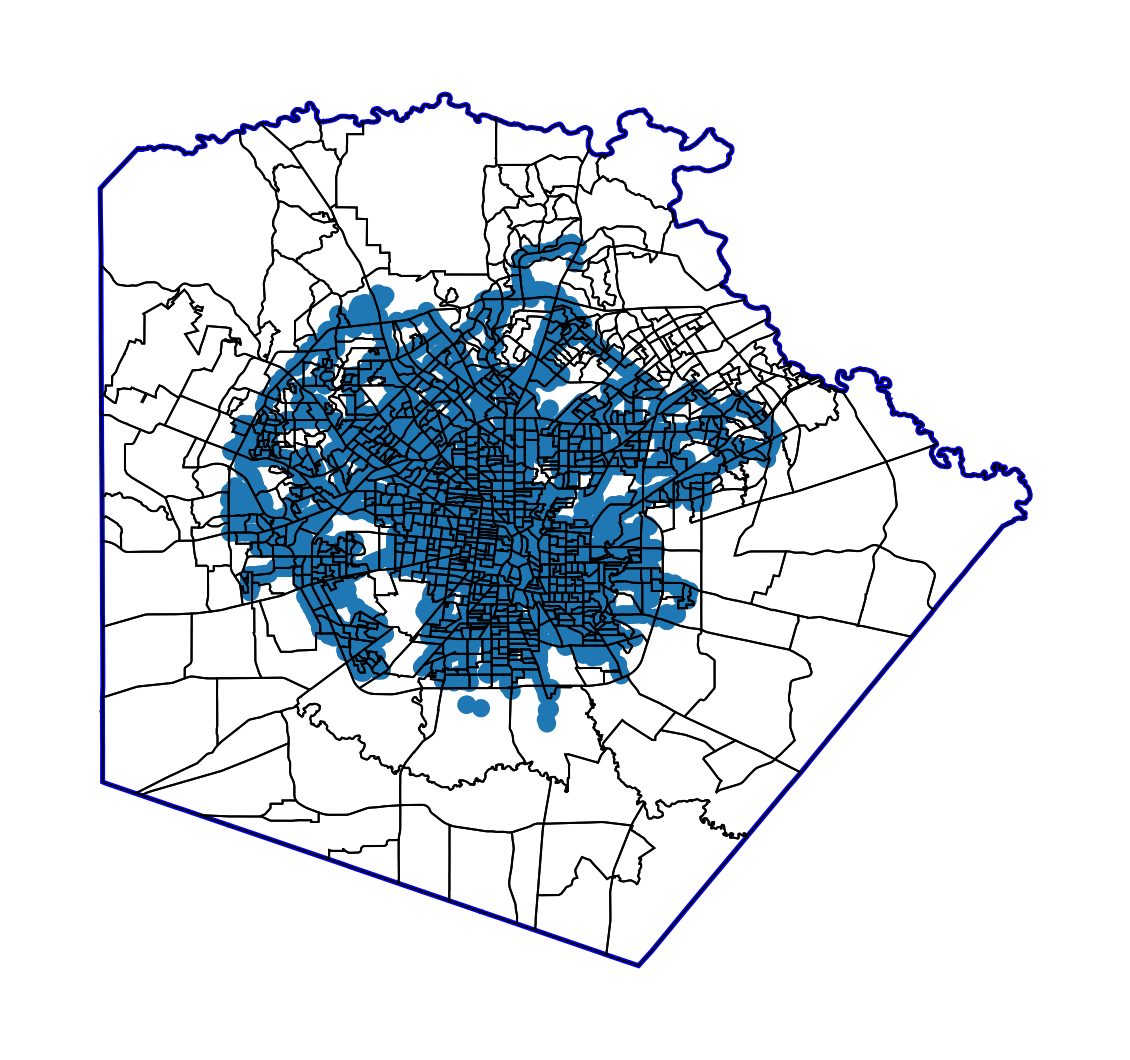

In [62]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
axbase = gplt.polyplot(gdf_county, ax=ax, facecolor='white', edgecolor='blue', linewidth=5, zorder=1)
ax1 = gdf_stops_buff.plot(ax=ax, zorder=10)
axt = gplt.polyplot(gdf_block_groups, ax=ax, facecolor='none', edgecolor='black', alpha=1, linewidth=2, zorder=20)
plt.show()

In [83]:
gdf_stops_groups = gpd.sjoin(gdf_block_groups, gdf_stops_buff, how='inner', op='intersects')

/usr/local/anaconda3/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != {'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [84]:
gdf_stops_groups.head()

,OBJECTID,SUM_POPULA,Shape_STAr,Shape_STLe,ShapeSTAre,ShapeSTLen,geometry_left,density,index_right,stop_code,stop_name,stop_lat,stop_lon,wheelchair_boarding,geometry_right,point
480291101001,1,955,1.951706e+07,23279.128568,1.951706e+07,23279.128568,"POLYGON ((-98.48695 29.43502, -98.48626 29.434...",0.000049,59156,59156,MCCULLOUGH & EVERGREEN,29.442698,-98.491798,0,POINT (-98.49180 29.44270),POINT (-98.49180 29.44270)
480291108001,12,763,5.988346e+06,12016.387609,5.988346e+06,12016.387609,"POLYGON ((-98.48941 29.44388, -98.48883 29.443...",0.000127,59156,59156,MCCULLOUGH & EVERGREEN,29.442698,-98.491798,0,POINT (-98.49180 29.44270),POINT (-98.49180 29.44270)
480291108002,13,617,5.355413e+06,9238.302383,5.355413e+06,9238.302383,"POLYGON ((-98.49306 29.44704, -98.49305 29.445...",0.000115,59156,59156,MCCULLOUGH & EVERGREEN,29.442698,-98.491798,0,POINT (-98.49180 29.44270),POINT (-98.49180 29.44270)
480291108003,14,585,2.485041e+06,6568.077983,2.485041e+06,6568.077983,"POLYGON ((-98.49063 29.44705, -98.49029 29.447...",0.000235,59156,59156,MCCULLOUGH & EVERGREEN,29.442698,-98.491798,0,POINT (-98.49180 29.44270),POINT (-98.49180 29.44270)
480291109001,15,549,1.351762e+07,17832.946123,1.351762e+07,17832.946123,"POLYGON ((-98.47834 29.44103, -98.47826 29.440...",0.000041,59156,59156,MCCULLOUGH & EVERGREEN,29.442698,-98.491798,0,POINT (-98.49180 29.44270),POINT (-98.49180 29.44270)


In [65]:
gdf_stops_groups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42509 entries, 480291101001 to 480299801001
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OBJECTID             42509 non-null  int64   
 1   SUM_POPULA           42509 non-null  int64   
 2   Shape_STAr           42509 non-null  float64 
 3   Shape_STLe           42509 non-null  float64 
 4   ShapeSTAre           42509 non-null  float64 
 5   ShapeSTLen           42509 non-null  float64 
 6   geometry_left        42509 non-null  geometry
 7   density              42509 non-null  float64 
 8   index_right          42509 non-null  int64   
 9   stop_code            42509 non-null  int64   
 10  stop_name            42509 non-null  object  
 11  stop_lat             42509 non-null  float64 
 12  stop_lon             42509 non-null  float64 
 13  wheelchair_boarding  42509 non-null  int64   
 14  geometry_right       42509 non-null  geometry
dtypes: flo

In [66]:
gdf_stops_groups.OBJECTID.value_counts()

1       208
3       186
2       172
1071    171
11      163
       ... 
375       2
820       2
219       1
912       1
215       1
Name: OBJECTID, Length: 948, dtype: int64

In [67]:
service_block_groups = gdf_stops_groups.index.unique().to_list()

In [68]:
gdf_block_groups.loc[service_block_groups]

,OBJECTID,SUM_POPULA,Shape_STAr,Shape_STLe,ShapeSTAre,ShapeSTLen,geometry,density
BLOCKGROUP,,,,,,,,
480291101001,1,955,1.951706e+07,23279.128568,1.951706e+07,23279.128568,"POLYGON ((-98.48695 29.43502, -98.48626 29.434...",0.000049
480291108001,12,763,5.988346e+06,12016.387609,5.988346e+06,12016.387609,"POLYGON ((-98.48941 29.44388, -98.48883 29.443...",0.000127
480291108002,13,617,5.355413e+06,9238.302383,5.355413e+06,9238.302383,"POLYGON ((-98.49306 29.44704, -98.49305 29.445...",0.000115
480291108003,14,585,2.485041e+06,6568.077983,2.485041e+06,6568.077983,"POLYGON ((-98.49063 29.44705, -98.49029 29.447...",0.000235
480291109001,15,549,1.351762e+07,17832.946123,1.351762e+07,17832.946123,"POLYGON ((-98.47834 29.44103, -98.47826 29.440...",0.000041
...,...,...,...,...,...,...,...,...
480291918121,1049,2423,2.683240e+07,24577.976856,2.683240e+07,24577.976856,"POLYGON ((-98.48258 29.66604, -98.48225 29.666...",0.000090
480291918122,1050,1305,1.237991e+07,15550.683168,1.237990e+07,15550.683168,"POLYGON ((-98.48494 29.64831, -98.48379 29.647...",0.000105
480291918131,1051,4779,2.229088e+07,25018.571304,2.229088e+07,25018.571304,"POLYGON ((-98.49332 29.64525, -98.49343 29.645...",0.000214


In [69]:
gdf_stops_groups.stop_code.value_counts()

21606    14
98959    14
67389    13
67383    13
77283    13
         ..
98707     1
68566     1
82459     1
69537     1
26207     1
Name: stop_code, Length: 6491, dtype: int64

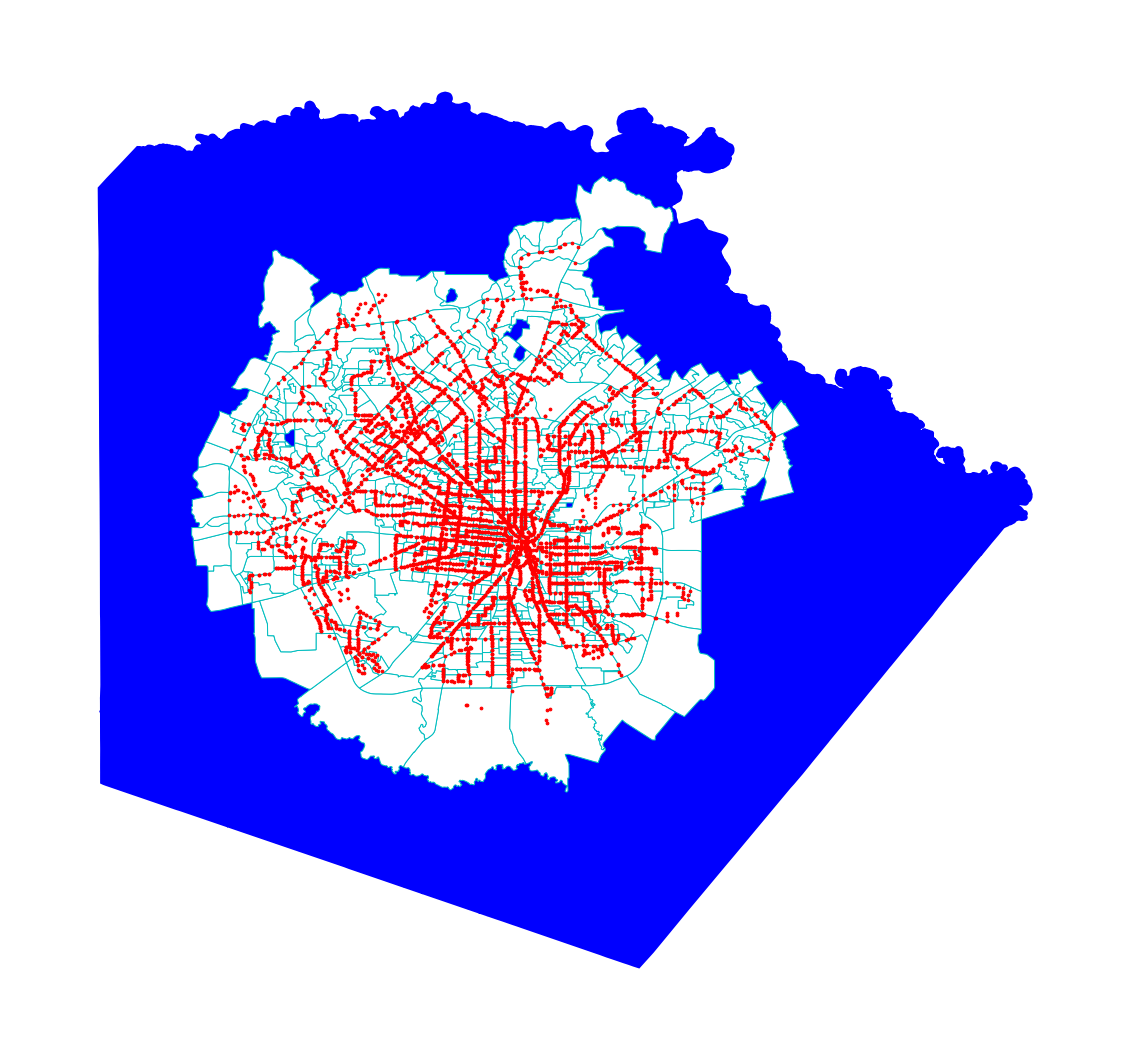

In [70]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
axbase = gplt.polyplot(gdf_county, ax=ax, facecolor='b', edgecolor='blue', linewidth=5, zorder=1)
gplt.polyplot(gdf_block_groups.loc[service_block_groups], ax=ax, facecolor='white', edgecolor='c', alpha=1, zorder=10)
ax1 = gdf_stops.plot(ax=ax, color='red', marker='.',markersize=30, zorder=20)
axbase = gplt.polyplot(gdf_county, ax=ax, facecolor='b', edgecolor='blue', linewidth=5, alpha=0, zorder=100)
plt.show()

In [71]:
gdf_stops_blocks = gpd.sjoin(gdf_blocks, gdf_stops_buff, how='inner', op='intersects')

/usr/local/anaconda3/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != {'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [72]:
gdf_stops_blocks = gdf_stops_blocks.to_crs('EPSG:3857')

AttributeError: 'DataFrame' object has no attribute 'to_crs'

In [ ]:
gdf_stops_blocks.head()

In [ ]:
gdf_stops_blocks.info()

In [ ]:
gdf_stops_blocks.OBJECTID.value_counts()

In [ ]:
service_blocks = gdf_stops_blocks.index.unique().to_list()

In [ ]:
gdf_blocks.loc[service_blocks]

In [ ]:
gdf_stops_blocks.stop_code.value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
axbase = gplt.polyplot(gdf_county, ax=ax, facecolor='b', edgecolor='blue', linewidth=5, zorder=1)
gplt.polyplot(gdf_blocks.loc[service_blocks], ax=ax, facecolor='white', edgecolor='c', linewidth=.25, alpha=1, zorder=10)
ax1 = gdf_stops.plot(ax=ax, color='red', marker='.',markersize=30, zorder=20)
axbase = gplt.polyplot(gdf_county, ax=ax, facecolor='b', edgecolor='blue', linewidth=5, alpha=0, zorder=100)
plt.show()